# Object and Gestures Detection Model

This project involves creating an Object and Gesture Detection Model as part of a school assignment. The goal is to develop a system that can accurately detect objects and recognize gestures made by a person, displaying the results in real-time. The project leverages computer vision and deep learning techniques to achieve robust and reliable detection and recognition.

## Project Overview

### Objective
The primary objective of this project is to design and implement a model that can:

1. **Detect Objects**: Identify and classify various objects shown by a person.
2. **Recognize Gestures**: Interpret specific hand gestures made by a person.


### Imports
<b>cv:</b> main import and the heart of this project it serves the bulid in Neural engine in our project <br>
<b>matpotlib:</b> To view video in detection period or images<br>
<b>os:</b> To write and read file smoothly<br>

In [2]:
import cv2 as cv 
import matplotlib.pyplot as plt 
import os 

### File and model initlizing

In [3]:
config_file = 'resources/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'resources/frozen_inference_graph.pb'
img_folder = "data/images"
video_folder = "data/videos"

### List of images and videos

In [4]:
def ren_dir_file(dir_folder_index):
    if(dir_folder_index == 0):
        files = files_and_dirs = os.listdir(img_folder) 
        files = [img_folder+'/'+i for i in files]
        return files
    elif(dir_folder_index == 1):   
        files = files_and_dirs = os.listdir(video_folder) 
        files = [video_folder+'/'+i for i in files]
        return files
    else:
        print("Invalid Index")

### Building model

In [5]:
model = cv.dnn_DetectionModel(frozen_model, config_file)

### Fetching data from .txt file in the directory

In [6]:
labels = []
with open('resources/labels.txt','r') as f: # path is defined 
    for i in f:
        labels.append(i.split("\n")[0])

### Setting frame of the image

In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127,5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000018A72C08D10>

### Main Function to detect Objects from Images
<i>To set path of images</i><br>
<b>os module:</b> It is used here to get list of images and to render it automatically.<br>
<b>matplotlib:</b> To preview image.

In [8]:
def img_object_detect(index):
    img = cv.imread(folder[index])
    ClassIndex,confidence,bbox = model.detect(img,confThreshold = 0.5)
    font_scale = 3
    font= cv.FONT_HERSHEY_PLAIN
    for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
        cv.rectangle(img, boxes, (255,0,0),2)
        cv.putText(img, labels[ClassInd-1], (boxes[0]+8, boxes[1]+32), font, font_scale, color=(0,255,0), thickness=2)
        plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

### Calling to the function

In [9]:
folder = ren_dir_file(0)

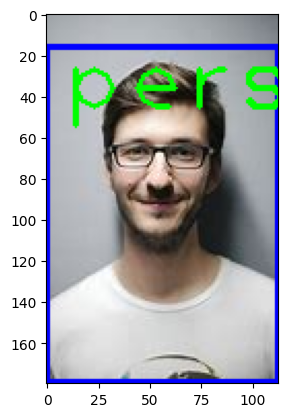

In [10]:
img_object_detect(1)

### Video

### object detection in video

In [18]:
def object_detection_in_video():
    video = ren_dir_file(1)[0]
    cap = cv.VideoCapture(video)  # Open the video file
    font_scale = 3
    font = cv.FONT_HERSHEY_PLAIN
    
    if not cap.isOpened():  # Check if the video file is opened successfully
        cap = cv.VideoCapture(0)  # Attempt to open the default webcam
        if not cap.isOpened():
            raise IOError("Can't open the video or webcam")
        
        
    while True:
        ret, frame = cap.read()  # Read a frame from the video source
        if not ret:  # If frame is not valid, break the loop
                break
        
        # Perform object detection
        ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
        print(ClassIndex)
        if len(ClassIndex) != 0:
            for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
                if ClassInd <= 80:  # Example condition, adjust as per your model's classes
                    cv.rectangle(frame, boxes, (255, 0, 0), 2)  # Draw bounding box
                    cv.putText(frame, labels[ClassInd - 1], (boxes[0] + 8, boxes[1] + 32), font, font_scale,
                                color=(0, 255, 0), thickness=2)  # Add label
        
        cv.imshow('Obj Detection', frame)  # Display the frame with detections
        
        if cv.waitKey(1) & 0xFF == ord('q'):  # Exit loop on 'q' key press
            break
        
    cap.release()  # Release the video capture object
    cv.destroyAllWindows()  # Close all OpenCV windows

In [20]:
object_detection_in_video()

[1 1 1]
[1 1 1 3]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1 3]
[1]
[1]
[1 3]
[1 3]
[1 3]
[1 3]
[1 3]
[1 3]
[1 3]
[1 3 1]
[1 3 1]
[1 1 3 3]
[1 3 1 3]
[3 1 1 3]
[3 3 3 1]
[1 3 3]
[3 1]
[1 3]
[1 3]
[1 3]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1]
[3]
[3]
[3]
[3]
[3]
[3 3]
[3 1]
[3 1 3]
[3 1 3]
[3 1 3]
[3 1 3]
[3 1 3 1]
[3 1 1 3]
[3 1 3]
[3 1 3 1]
[3 1 3 1]
[3 1 3 1]
[3 1 3]
[3 1 3 1]
[3 3 1]
[3 1 3]
[3 1 3]
[3 1 3]
[3 1 3]
[3 1 3]
[1 3 1 3]
[3 1 3 1]
[3 3 1]
[1 3 1]
[1 3 1]
[1 3]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1 1]
[1]
[1 3]
[3 1]
[1 3]
[1]
[1]
[1 3]
[1 3]
[1]
[1 3]
[1 6 3]
[6 1 3]
[1 3 8]
[8]
[8 1]
[8]
[8]
[8 3]
[8 3]
[8 6 3]
[8 3]
[ 8 28  6  3]
[ 6 28  8  3]
[ 6  8  1  3 28]
[ 8  1  6  3 28 28]
[ 1  8 28  3]
[ 8  1 28  3]
[ 1  8 28  3]
[ 1  8 28  3]
[ 1 28  8  6  3]
[ 1 28  6  8  3]
[ 1  8 28  6]
[ 1 28  6  8]
[ 1  8 28]
[ 1 28  6]
[ 1 28  8]
[ 1 28  8]
[ 1 28  8]
[ 1 28  8]
[ 1 28  8]
[ 1  8 28]
[28  8  1]
[28  1  8]
[28  

KeyboardInterrupt: 